# Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import os
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split


Using TensorFlow backend.
/home/vipin/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/vipin/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/vipin/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/vipin/.local/lib/python3.6/site-packages/tensorflow/python/fra

# Loading the data

In [2]:
DATA_DIR = 'Data'
CATEGORIES = os.listdir(DATA_DIR)
IMG_SIZE=100
CATEGORIES


['buffalo', 'rhino', 'zebra', 'elephant']

In [3]:
data = []
for category in CATEGORIES:
    label = CATEGORIES.index(category)
    path = os.path.join(DATA_DIR, category)
    for img in os.listdir(path):
        try:
            img_array = cv2.imread(os.path.join(path,img))
            new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
            data.append([label,new_array])
        except Exception as E:
            pass

In [4]:
data

[[0,
  array([[[147, 219, 191],
          [168, 234, 207],
          [157, 214, 187],
          ...,
          [ 39,  76,  56],
          [ 38,  69,  50],
          [ 37,  66,  47]],
  
         [[144, 224, 197],
          [159, 223, 199],
          [202, 243, 222],
          ...,
          [ 42,  79,  59],
          [ 40,  71,  52],
          [ 38,  66,  47]],
  
         [[135, 223, 197],
          [160, 221, 198],
          [232, 254, 239],
          ...,
          [ 44,  80,  60],
          [ 42,  72,  53],
          [ 38,  66,  46]],
  
         ...,
  
         [[213, 237, 242],
          [186, 223, 225],
          [170, 215, 216],
          ...,
          [217, 237, 247],
          [ 85, 119, 103],
          [ 58,  98,  68]],
  
         [[180, 214, 217],
          [145, 192, 192],
          [141, 192, 192],
          ...,
          [209, 228, 242],
          [ 95, 127, 116],
          [ 86, 124,  99]],
  
         [[186, 228, 229],
          [155, 208, 208],
          [151, 207

In [5]:
#checking shape
np.shape(data)

(1504, 2)

# Separating label and feature

In [6]:
X = []
Y = []

for label,feature in data:
    X.append(feature)
    Y.append(label)



In [7]:
#checking shape of features
print(np.shape(X))

(1504, 100, 100, 3)


In [8]:
#checking shape of labels
print(np.shape(Y))

(1504,)


In [9]:
#converting both array to numpy array
X = np.array(X)
Y = np.array(Y)

# Normalization

In [10]:
X = X / 255

In [11]:
X

array([[[[0.57647059, 0.85882353, 0.74901961],
         [0.65882353, 0.91764706, 0.81176471],
         [0.61568627, 0.83921569, 0.73333333],
         ...,
         [0.15294118, 0.29803922, 0.21960784],
         [0.14901961, 0.27058824, 0.19607843],
         [0.14509804, 0.25882353, 0.18431373]],

        [[0.56470588, 0.87843137, 0.77254902],
         [0.62352941, 0.8745098 , 0.78039216],
         [0.79215686, 0.95294118, 0.87058824],
         ...,
         [0.16470588, 0.30980392, 0.23137255],
         [0.15686275, 0.27843137, 0.20392157],
         [0.14901961, 0.25882353, 0.18431373]],

        [[0.52941176, 0.8745098 , 0.77254902],
         [0.62745098, 0.86666667, 0.77647059],
         [0.90980392, 0.99607843, 0.9372549 ],
         ...,
         [0.17254902, 0.31372549, 0.23529412],
         [0.16470588, 0.28235294, 0.20784314],
         [0.14901961, 0.25882353, 0.18039216]],

        ...,

        [[0.83529412, 0.92941176, 0.94901961],
         [0.72941176, 0.8745098 , 0.88235294]

In [12]:
np.max(X)

1.0

In [13]:
Y

array([0, 0, 0, ..., 3, 3, 3])

# Plotting Some value with labels

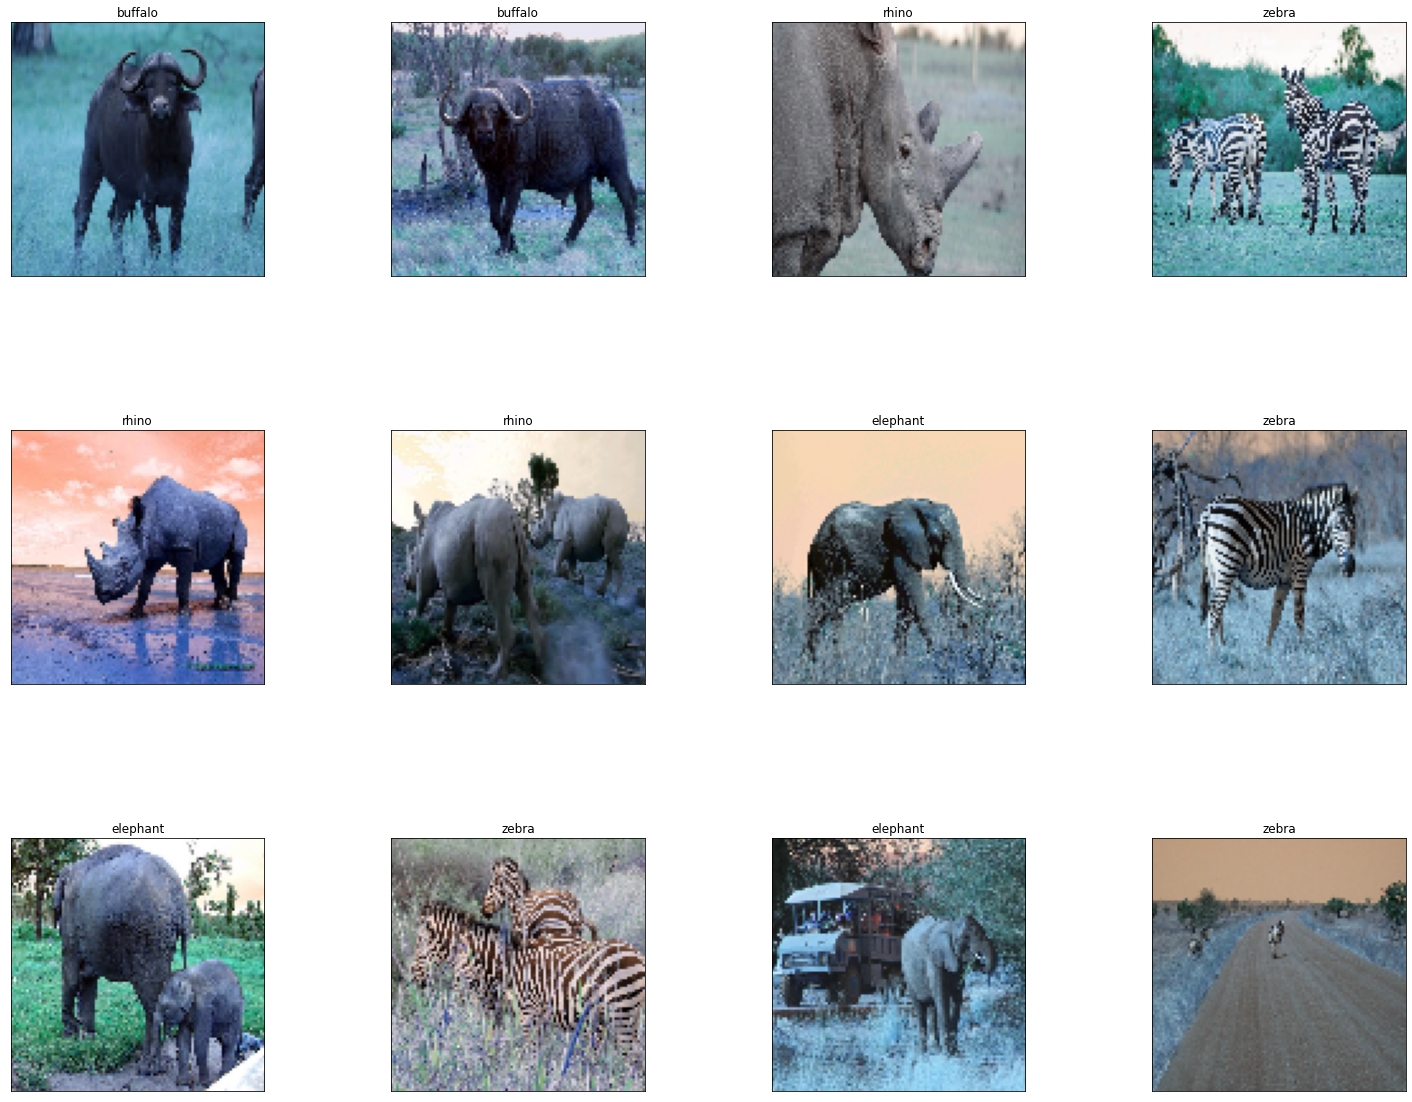

In [14]:
val = np.random.randint(0, len(X), 12)
r = 1
plt.figure(figsize=(25,20))
for value in val:
    plt.subplot(3,4,r)
    plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
    plt.xticks([]) , plt.yticks([])
    plt.title(CATEGORIES[Y[value]])
    r += 1
    plt.imshow(X[value])
plt.show()

# Converting labels to categorical values

In [15]:
Y = to_categorical(Y)

# Spliting the data into train,test and validation

In [16]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.1,random_state=0)
x_train,x_val,y_train,y_val = train_test_split(x_train,y_train,test_size=0.1,random_state=0)

# model

In [17]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout, BatchNormalization
model = Sequential()
model.add(Conv2D(64,3,padding='same', input_shape=(100,100,3)))
model.add(MaxPool2D((4,4)))
model.add(Conv2D(32,3,padding='same', input_shape=(100,100,3)))
model.add(MaxPool2D((4,4)))
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(64))
model.add(Dense(32))
model.add(Dropout(0.5))
model.add(Dense(16))
model.add(Dropout(0.5))
model.add(Dense(4))

model.add(Dense(4, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 100, 100, 64)      1792      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 25, 25, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 25, 25, 32)        18464     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1152)              0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 1152)              4608      
_________________________________________________________________
dense_1 (Dense)              (None, 64)              

# Data Augumentation

In [18]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
    rotation_range = 10,
    zoom_range = 0.1,
    width_shift_range = 0.1,
    height_shift_range = 0.1
)
datagen.fit(x_train)

# Fitting the model

In [19]:
history = model.fit_generator(datagen.flow(x_train,y_train,batch_size=32), epochs=200, validation_data=(x_val,y_val))


Epoch 1/200
39/39 [==============================] - 7s 182ms/step - loss: 3.4193 - accuracy: 0.3624 - val_loss: 1.3942 - val_accuracy: 0.2500
Epoch 2/200
39/39 [==============================] - 7s 190ms/step - loss: 2.4399 - accuracy: 0.3969 - val_loss: 1.2845 - val_accuracy: 0.3162
Epoch 3/200
39/39 [==============================] - 7s 175ms/step - loss: 1.9282 - accuracy: 0.4412 - val_loss: 1.1057 - val_accuracy: 0.5662
Epoch 4/200
39/39 [==============================] - 8s 203ms/step - loss: 1.5328 - accuracy: 0.4684 - val_loss: 1.1494 - val_accuracy: 0.4485
Epoch 5/200
39/39 [==============================] - 8s 204ms/step - loss: 1.3841 - accuracy: 0.5053 - val_loss: 1.0008 - val_accuracy: 0.5294
Epoch 6/200
39/39 [==============================] - 7s 176ms/step - loss: 1.2698 - accuracy: 0.5029 - val_loss: 1.0069 - val_accuracy: 0.5588
Epoch 7/200
39/39 [==============================] - 8s 203ms/step - loss: 1.1637 - accuracy: 0.5292 - val_loss: 0.9347 - val_accuracy: 0.661

39/39 [==============================] - 7s 187ms/step - loss: 0.7079 - accuracy: 0.7231 - val_loss: 1.7691 - val_accuracy: 0.5662
Epoch 57/200
39/39 [==============================] - 8s 212ms/step - loss: 0.7066 - accuracy: 0.7288 - val_loss: 0.9088 - val_accuracy: 0.6838
Epoch 58/200
39/39 [==============================] - 8s 210ms/step - loss: 0.6863 - accuracy: 0.7321 - val_loss: 1.0107 - val_accuracy: 0.6838
Epoch 59/200
39/39 [==============================] - 8s 212ms/step - loss: 0.6501 - accuracy: 0.7395 - val_loss: 0.9650 - val_accuracy: 0.6765
Epoch 60/200
39/39 [==============================] - 8s 205ms/step - loss: 0.6483 - accuracy: 0.7412 - val_loss: 1.0176 - val_accuracy: 0.5809
Epoch 61/200
39/39 [==============================] - 8s 201ms/step - loss: 0.7202 - accuracy: 0.7338 - val_loss: 1.6312 - val_accuracy: 0.4926
Epoch 62/200
39/39 [==============================] - 8s 194ms/step - loss: 0.6889 - accuracy: 0.7461 - val_loss: 0.6929 - val_accuracy: 0.7132
Epoch

Epoch 113/200
39/39 [==============================] - 9s 237ms/step - loss: 0.6095 - accuracy: 0.7921 - val_loss: 1.7049 - val_accuracy: 0.5662
Epoch 114/200
39/39 [==============================] - 8s 203ms/step - loss: 0.6013 - accuracy: 0.7938 - val_loss: 1.2170 - val_accuracy: 0.6029
Epoch 115/200
39/39 [==============================] - 9s 239ms/step - loss: 0.5901 - accuracy: 0.7790 - val_loss: 1.4392 - val_accuracy: 0.5588
Epoch 116/200
39/39 [==============================] - 9s 221ms/step - loss: 0.5804 - accuracy: 0.7938 - val_loss: 1.7276 - val_accuracy: 0.6103
Epoch 117/200
39/39 [==============================] - 8s 214ms/step - loss: 0.5668 - accuracy: 0.8053 - val_loss: 0.9468 - val_accuracy: 0.7279
Epoch 118/200
39/39 [==============================] - 9s 233ms/step - loss: 0.5817 - accuracy: 0.7938 - val_loss: 1.3750 - val_accuracy: 0.6176
Epoch 119/200
39/39 [==============================] - 9s 226ms/step - loss: 0.5435 - accuracy: 0.8184 - val_loss: 1.8871 - val_ac

39/39 [==============================] - 9s 218ms/step - loss: 0.4992 - accuracy: 0.8143 - val_loss: 2.4306 - val_accuracy: 0.5294
Epoch 170/200
39/39 [==============================] - 8s 201ms/step - loss: 0.4673 - accuracy: 0.8332 - val_loss: 1.3417 - val_accuracy: 0.6838
Epoch 171/200
39/39 [==============================] - 8s 212ms/step - loss: 0.4748 - accuracy: 0.8258 - val_loss: 0.9866 - val_accuracy: 0.6912
Epoch 172/200
39/39 [==============================] - 9s 234ms/step - loss: 0.5264 - accuracy: 0.8143 - val_loss: 0.9843 - val_accuracy: 0.7059
Epoch 173/200
39/39 [==============================] - 9s 234ms/step - loss: 0.5041 - accuracy: 0.8291 - val_loss: 0.8516 - val_accuracy: 0.7500
Epoch 174/200
39/39 [==============================] - 9s 228ms/step - loss: 0.4512 - accuracy: 0.8365 - val_loss: 0.9024 - val_accuracy: 0.7279
Epoch 175/200
39/39 [==============================] - 8s 198ms/step - loss: 0.4982 - accuracy: 0.8258 - val_loss: 2.1117 - val_accuracy: 0.5662

In [20]:
# model.fit(x_train,y_train, epochs=50)

# Predicting the test values

In [21]:
y_pred = model.predict(x_test)

# accuracy of the model

In [22]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred.round()))

0.6423841059602649


# Plotting loss graph

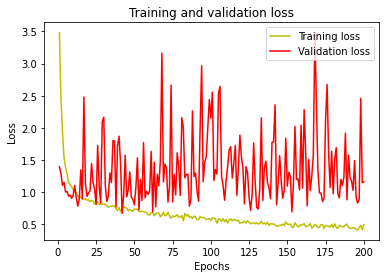

In [23]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plotting accuracy graph

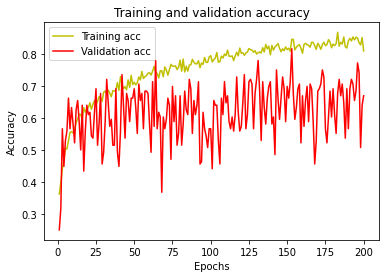

In [24]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()